In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 500)
%matplotlib inline
sns.set_theme()
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm

In [4]:
data = pd.read_csv('df_clean.csv')
data.head()

,code_insee_region,region,nature,date,heure,date_heure,consommation_mw,thermique_mw,nucleaire_mw,eolien_mw,solaire_mw,hydraulique_mw,pompage_mw,bioenergies_mw,ech._physiques_mw,total_prod,prod_energie_green,jour,mois,annee
0,24,Centre-Val de Loire,Données définitives,2013-01-01 00:00:00,2022-05-11 00:30:00,2012-12-31 23:30:00+00:00,2476.0,90.0,9085.0,508.0,0.0,34.0,0.0,25.0,-7267.0,9742.0,657.0,1,1,2013
1,44,Grand Est,Données définitives,2013-01-01 00:00:00,2022-05-11 00:30:00,2012-12-31 23:30:00+00:00,4943.0,319.0,9137.0,1109.0,0.0,1418.0,0.0,57.0,-7102.0,12040.0,2903.0,1,1,2013
2,11,Île-de-France,Données définitives,2013-01-01 00:00:00,2022-05-11 00:30:00,2012-12-31 23:30:00+00:00,9134.0,685.0,0.0,16.0,0.0,0.0,0.0,142.0,8289.0,843.0,843.0,1,1,2013
3,52,Pays de la Loire,Données définitives,2013-01-01 00:00:00,2022-05-11 00:30:00,2012-12-31 23:30:00+00:00,3595.0,127.0,0.0,182.0,0.0,0.0,0.0,32.0,3252.0,341.0,341.0,1,1,2013
4,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01 00:00:00,2022-05-11 00:30:00,2012-12-31 23:30:00+00:00,5570.0,537.0,0.0,12.0,0.0,1412.0,0.0,58.0,3548.0,2019.0,2019.0,1,1,2013


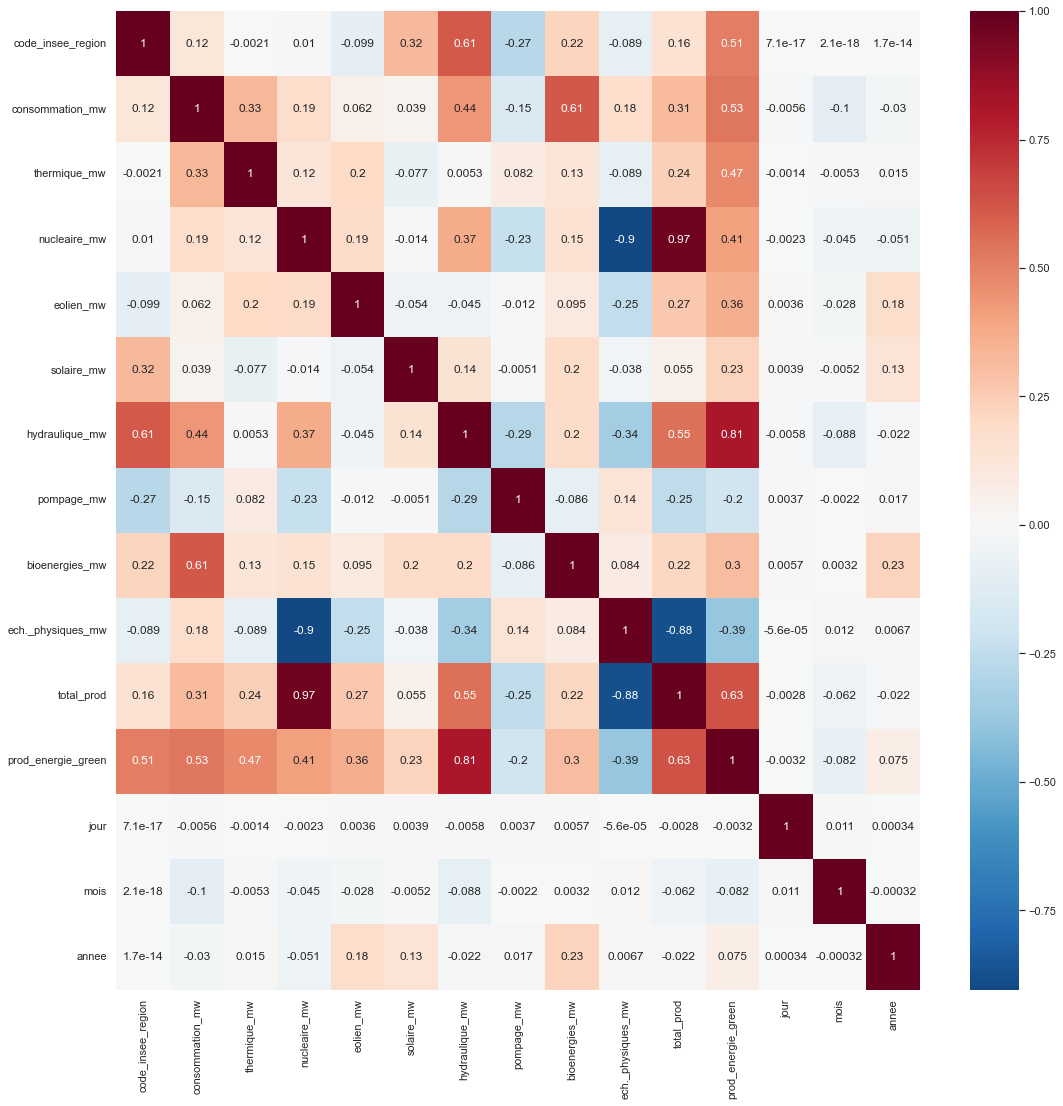

In [3]:
plt.figure(figsize=(18, 18))

sns.heatmap(data.corr(), annot=True, cmap="RdBu_r", center=0);

# Etudes statistiques permettant d'analyser la correlation entre les variables

Nous allons réaliser un test de Pearson afin d'observer si les variables quantitatives sont correlées entre elles.


In [5]:
pd.DataFrame(pearsonr(data['total_prod'], data['nucleaire_mw']), index=['pearson_coeff','p-value'], columns=['resultat_test'])


,resultat_test
pearson_coeff,0.965423
p-value,0.000000


Ici, on note que le coeff. de Pearson est proche de 1, donc les variables 'total_prod' et 'nucleaire' sont fortement correlées, ce qui confirme les résultats précédents sachant que la majorité de la production energétique française provient du nucleaire.

Regardons maintenant ce qu'il en est des autres types d'energie en faisant apparaitre la matrice de correlation des coeff de Pearson pour notre jeu de données.

In [10]:
data.corr()

,code_insee_region,consommation_mw,thermique_mw,nucleaire_mw,eolien_mw,solaire_mw,hydraulique_mw,pompage_mw,bioenergies_mw,ech._physiques_mw,total_prod,prod_energie_green,jour,mois,annee
code_insee_region,1.000000e+00,0.117368,-0.002150,0.010140,-0.099114,0.320736,0.611973,-0.272424,0.222261,-0.088772,0.155114,0.512342,7.055353e-17,2.052736e-18,1.719284e-14
consommation_mw,1.173679e-01,1.000000,0.332304,0.186962,0.062092,0.039451,0.438966,-0.145985,0.613292,0.180297,0.310550,0.531632,-5.602885e-03,-1.046695e-01,-3.013846e-02
thermique_mw,-2.149638e-03,0.332304,1.000000,0.122664,0.200841,-0.076812,0.005285,0.082151,0.125961,-0.089397,0.238980,0.471996,-1.350683e-03,-5.266999e-03,1.549392e-02
nucleaire_mw,1.014041e-02,0.186962,0.122664,1.000000,0.190263,-0.013626,0.374763,-0.231579,0.151726,-0.904076,0.965423,0.411128,-2.255462e-03,-4.497774e-02,-5.076535e-02
eolien_mw,-9.911439e-02,0.062092,0.200841,0.190263,1.000000,-0.054496,-0.045057,-0.011955,0.095369,-0.245669,0.265024,0.362652,3.607043e-03,-2.826470e-02,1.766926e-01
solaire_mw,3.207362e-01,0.039451,-0.076812,-0.013626,-0.054496,1.000000,0.138890,-0.005149,0.196108,-0.037823,0.055201,0.233428,3.862570e-03,-5.218666e-03,1.317469e-01
hydraulique_mw,6.119727e-01,0.438966,0.005285,0.374763,-0.045057,0.138890,1.000000,-0.285508,0.196231,-0.340250,0.549027,0.808756,-5.803745e-03,-8.832150e-02,-2.217208e-02
pompage_mw,-2.724242e-01,-0.145985,0.082151,-0.231579,-0.011955,-0.005149,-0.285508,1.000000,-0.086031,0.136995,-0.253465,-0.199739,3.674479e-03,-2.207866e-03,1.723368e-02
bioenergies_mw,2.222613e-01,0.613292,0.125961,0.151726,0.095369,0.196108,0.196231,-0.086031,1.000000,0.083996,0.215724,0.304512,5.681781e-03,3.207711e-03,2.289236e-01
ech._physiques_mw,-8.877168e-02,0.180297,-0.089397,-0.904076,-0.245669,-0.037823,-0.340250,0.136995,0.083996,1.000000,-0.877598,-0.388411,-5.573988e-05,1.249551e-02,6.703202e-03


On observe que toutes les natures d'energie sont correlées avec la production avec plus ou moins d'importance. On note que l'energie hydraulique est celle qui presente le plus de correlation avec la production d'energie renouvelable. 

Ici, nous effectuons un test ANOVA pour observer la relation entre variables quantitatives (consommation et production energetiques) et variables qualitatives (region, mois, année).

On regarde s' il y a une influence des régions et des mois sur les types d'energies produits. 

In [17]:
attributes = data.iloc[:,8:14].columns
results = {}

for i in attributes : 
    energie = ols('{} ~ code_insee_region + mois + annee'.format(i), data=data).fit()
    table = anova_lm(energie)
    liste_p_value = table['PR(>F)'].iloc[:3].to_list()
    results[i] = liste_p_value

results

{'nucleaire_mw': [1.9116975798641288e-44, 0.0, 0.0],
 'eolien_mw': [0.0, 0.0, 0.0],
 'solaire_mw': [0.0, 1.9220386460987523e-14, 0.0],
 'hydraulique_mw': [0.0, 0.0, 0.0],
 'pompage_mw': [0.0, 0.0015891512841668656, 4.041747201010603e-134],
 'bioenergies_mw': [0.0, 3.2060763467275827e-06, 0.0]}

En observant les p-valeurs (<0.05), on peut conclure que la région de production, le mois et l'année ont des effets significatifs sur les types d'énergie produits.


Regardons désormais la corrélation entre la region de production, le mois et l'année et la consommation d'energie.

In [21]:
conso = ols('consommation_mw ~ code_insee_region + mois + annee', data=data).fit()
table = anova_lm(conso)

display(table)


,df,sum_sq,mean_sq,F,PR(>F)
code_insee_region,1.0,1.224674e+11,1.224674e+11,26766.912731,0.0
mois,1.0,9.740073e+10,9.740073e+10,21288.250466,0.0
annee,1.0,8.093632e+09,8.093632e+09,1768.973030,0.0
Residual,1893296.0,8.662451e+12,4.575328e+06,NaN,NaN


Les p-value étant inferieures à 0.05, on peut en conclure que nos 3 variables ont un effet statistique significatif sur la consommation.